ANALYSIS 4

In [27]:
%matplotlib inline

In [28]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [29]:
df = pd.read_csv("CARS.csv")

In [30]:
df.head(5) 

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [31]:
df.tail(5)      

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


Checking the types of data

In [32]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

Dropping the duplicate rows

In [33]:
df.shape

(428, 15)

In [34]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


Now let us remove the duplicate data because it's ok to remove them.

In [35]:
df.count()      # Used to count the number of rows

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

In [36]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [37]:
df.count()

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

Dropping the missing or null values.

In [38]:
print(df.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [39]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make           426
Model          426
Type           426
Origin         426
DriveTrain     426
MSRP           426
Invoice        426
EngineSize     426
Cylinders      426
Horsepower     426
MPG_City       426
MPG_Highway    426
Weight         426
Wheelbase      426
Length         426
dtype: int64

In [40]:
print(df.isnull().sum())   # After dropping the values

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


Converting the object values to integer type.

While having a look at the data, the MSRP was stored as an object type. This is a serious problem because it is impossible to plot those values on a graph because it is a primary requirement that during plotting a graph all the values must be of type integer data. The author has stored, the MSRP in a different format ($36, 000) so I had to remove the formatting and then convert them to an integer.

In [41]:
# Removing the formatting
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]  

In [42]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

PLOTTING GRAPHS AND COMPARING THEM WITH THEIR ENGINE SIZE,PRICE,TYPE

Plotting different features against one another.

Histogram

Histogram refers to the frequency of occurrence of variables in an interval. Here, there are mainly 10 different car manufacturing companies, but it is often important to know who has the maximum number of cars. I'm just plotting histograms to find the total number of car manufacturers and this plot does not support my predictions or doesn't have relations with the price feature. Plotting a histogram is one of a trivial solution which lets us know the total number of different car manufacturers. From the histogram below it can be seen that Ford has almost several cars (20) followed by Chevrolet (19) and many more.

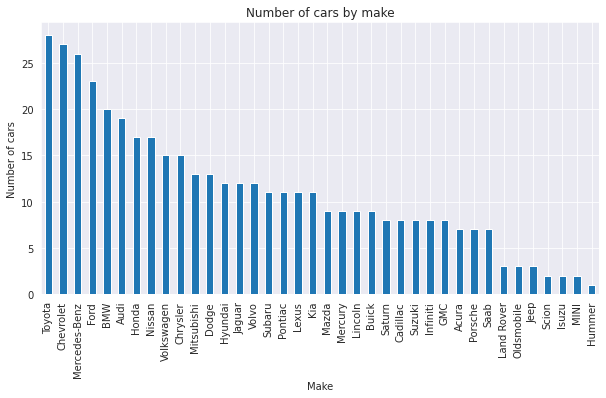

In [43]:
# Plotting a Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

Heat Maps

Heat Maps is a plot which is necessary when we need to find the dependent variables. One of the best ways to find the correlation between the features can be done using heat maps. As shown below the price feature (MSRP) has a strong correlation with Horsepower of 82% this is very important because the more the relationship between the variables the more accurate the model will be. This is how the correlation between the features can be found using heat maps. With the help of heat maps I can use these related features in building my model.

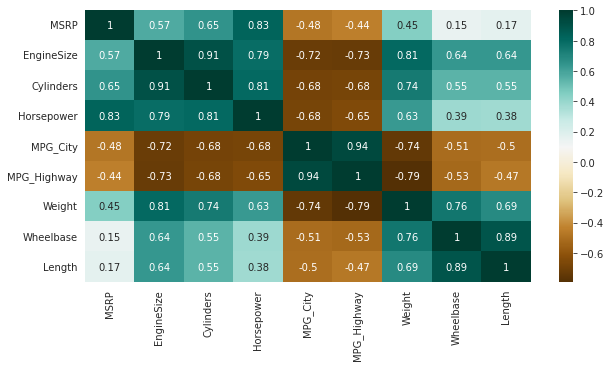

In [44]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Scatterplot between two related varirables

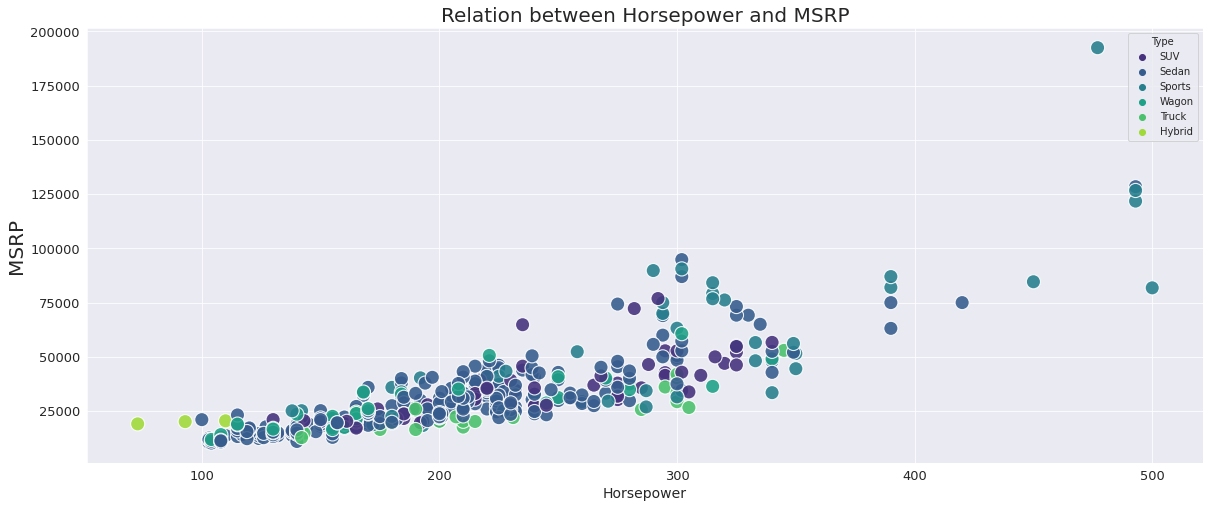

In [45]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x='Horsepower', y='MSRP',hue='Type',palette='viridis',alpha=.89, s=200 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Horsepower',fontsize=14)
plt.ylabel('MSRP',fontsize=20)
plt.title('Relation between Horsepower and MSRP',fontsize=20);

Horsepower of car seems to be highly related to car price. 

Using more interactive plot to show the previous plot and also adding the car manufacturer

In [46]:
fig = px.scatter_3d(df, x='Horsepower', z='MSRP', y='Make',color='Type',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();